# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import timedelta
from datetime import datetime
import json

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|█████████████████| 8.61M/8.61M [00:00<00:00, 18.5MB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
html = browser.html
html[0:500]

'<html lang="en"><head>\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <meta name="description" content="">\n  <meta name="author" content="Mark Otto, Jacob Thornton, and Bootstrap contributors">\n  <meta name="generator" content="Hugo 0.84.0">\n  <title>Mars Temperature Data</title>\n\n  <link rel="canonical" href="https://getbootstrap.com/docs/5.0/examples/jumbotron/">\n\n  <!-- Bootstrap core CSS -->\n  <link rel="stylesheet" href="https://stackpath.b'

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
soup = soup(html, 'html.parser') 
type(soup)

bs4.BeautifulSoup

In [6]:
# Extract all rows of data
soup.find_all('tr')

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

In [7]:
table = soup.find_all('table',{'class':'table'})
len(table)

1

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
trs = soup.find_all('tr', class_="data-row")
#create an empty list
rows = []
# loop through the scraped data to create a list of rows
#for tr in trs:
    #tds = tr.find_all('td')
    #row_td = []
    #for td in tds:
        #row_td.append(td.text)
        
    #rows.append(row_td)
    #print(rows)
for tr in trs:
    tds = tr.find_all('td')
    row_stuff = [col.text for col in tds]
    rows.append(row_stuff)

In [9]:
print(rows)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [10]:
tcol = soup.find_all('th')
#create an empty list
cols = []
# loop through the scraped data to create a list of rows
for tr in tcol:
    print(tr.text)
    # Create a list of column headers
    cols.append(tr.text)

id
terrestrial_date
sol
ls
month
min_temp
pressure


In [11]:
print(cols)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=cols)
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [14]:
# Change data types for data analysis

df['terrestrial_date'] = pd.to_datetime(df.terrestrial_date)

df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [15]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [16]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [17]:
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
pd.value_counts(df['month']).sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [19]:
num_months = df['month'].nunique()
print(f' Mars has {num_months} months.')

 Mars has 12 months.


In [20]:
# 2. How many Martian days' worth of data are there?
days_of_data = df['sol'].count()
print(f'There are {days_of_data} Martian days worth of data')

There are 1867 Martian days worth of data


In [21]:
# 3. What is the average low temperature by month?
lo_temp_avg=[]

for i in range(1,num_months+1):
    min_temp_per_month = {"month":"","lo_temp_avg":""}
    avg_monthly_lo_temp = df.loc[df['month']==i]['min_temp'].mean()
    min_temp_per_month['lo_temp_avg'] = round(avg_monthly_lo_temp)
    min_temp_per_month["month"] = i
    lo_temp_avg.append(min_temp_per_month)

print(lo_temp_avg)

[{'month': 1, 'lo_temp_avg': -77}, {'month': 2, 'lo_temp_avg': -80}, {'month': 3, 'lo_temp_avg': -83}, {'month': 4, 'lo_temp_avg': -83}, {'month': 5, 'lo_temp_avg': -79}, {'month': 6, 'lo_temp_avg': -75}, {'month': 7, 'lo_temp_avg': -72}, {'month': 8, 'lo_temp_avg': -68}, {'month': 9, 'lo_temp_avg': -69}, {'month': 10, 'lo_temp_avg': -72}, {'month': 11, 'lo_temp_avg': -72}, {'month': 12, 'lo_temp_avg': -74}]


In [22]:
# 3. What is the average low temperature by month?
avg_lo_temp = df.groupby(['month'])['min_temp'].mean()
avg_lo_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [23]:
# Plot the average temperature by month
avg_temp_df = pd.DataFrame(avg_lo_temp).reset_index(drop=False)
avg_temp_df

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


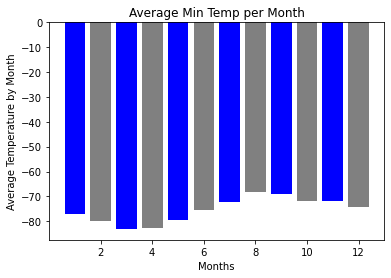

In [24]:
c = ['blue','grey','blue','grey','blue','grey','blue','grey','blue','grey','blue','grey']
plt.bar(avg_temp_df['month'],avg_temp_df['min_temp'], color=c,)
plt.xlabel("Months")
plt.ylabel("Average Temperature by Month")
plt.title("Average Min Temp per Month")
plt.show()

In [25]:
lo_temp = df.groupby(['month'])['min_temp'].min()
lo_temp

month
1    -82.0
2    -86.0
3    -90.0
4    -89.0
5    -85.0
6    -84.0
7    -78.0
8    -75.0
9    -78.0
10   -81.0
11   -78.0
12   -81.0
Name: min_temp, dtype: float64

In [26]:
# Plot the average temperature by month
lo_temp_df = pd.DataFrame(lo_temp).reset_index(drop=False)
lo_temp_df

,month,min_temp
0,1,-82.0
1,2,-86.0
2,3,-90.0
3,4,-89.0
4,5,-85.0
5,6,-84.0
6,7,-78.0
7,8,-75.0
8,9,-78.0
9,10,-81.0


In [27]:
hi_temp = df.groupby(['month'])['min_temp'].max()
hi_temp

month
1    -62.0
2    -76.0
3    -77.0
4    -77.0
5    -74.0
6    -71.0
7    -65.0
8    -63.0
9    -63.0
10   -66.0
11   -67.0
12   -70.0
Name: min_temp, dtype: float64

In [28]:
hi_temp_df = pd.DataFrame(hi_temp).reset_index(drop=False)
hi_temp_df

,month,min_temp
0,1,-62.0
1,2,-76.0
2,3,-77.0
3,4,-77.0
4,5,-74.0
5,6,-71.0
6,7,-65.0
7,8,-63.0
8,9,-63.0
9,10,-66.0


In [29]:
# Identify the coldest and hottest months in Curiosity's location
hi_lo_temp_month = df.groupby(['month']).agg({"min_temp": ['min', 'max']})
hi_lo_temp_month_df = pd.DataFrame(hi_lo_temp_month).reset_index(drop=False)
hi_lo_temp_month_df

month min_temp      
              min   max
0      1    -82.0 -62.0
1      2    -86.0 -76.0
2      3    -90.0 -77.0
3      4    -89.0 -77.0
4      5    -85.0 -74.0
5      6    -84.0 -71.0
6      7    -78.0 -65.0
7      8    -75.0 -63.0
8      9    -78.0 -63.0
9     10    -81.0 -66.0
10    11    -78.0 -67.0
11    12    -81.0 -70.0

In [30]:
# 3. What is the average low temperature by month?
avg_lo_temp2 = df.groupby('month')['min_temp'].mean()
avg_lo_temp2

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

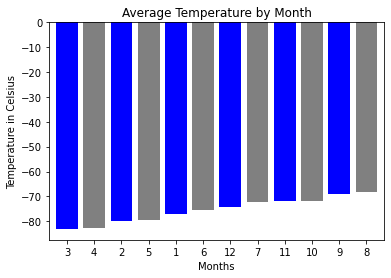

In [31]:
c = ['blue','grey','blue','grey','blue','grey','blue','grey','blue','grey','blue','grey']
avg_lo_temp2.sort_values().plot(kind='bar', width=.8, color=c, rot=0)
plt.ylabel('Temperature in Celsius')
plt.xlabel('Months')
plt.title('Average Temperature by Month')
plt.show()

In [32]:
# 4. Average pressure by Martian month
avg_psi_month = df.groupby('month')['pressure'].mean()
avg_psi_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

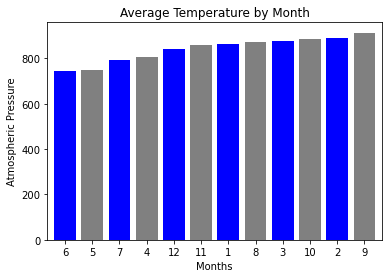

In [33]:
# Plot the average pressure by month
c = ['blue','grey','blue','grey','blue','grey','blue','grey','blue','grey','blue','grey']
avg_psi_month.sort_values().plot(kind='bar', width=.8, color=c, rot=0)
plt.ylabel('Atmospheric Pressure')
plt.xlabel('Months')
plt.title('Average Temperature by Month')
plt.show()

In [40]:
# 5. How many terrestrial (earth) days are there in a Martian year?
o_pos = df['ls'].loc[0]
o_pos 

155

In [49]:
nxt_o = df.loc[df['ls']==o_pos]
nxt_o

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [52]:
sp = nxt_o['terrestrial_date'].loc[0]
mart_yr_plus_one = nxt_o['terrestrial_date'].iloc[1]
mart_yr = mart_yr_plus_one - sp
mart_yr

Timedelta('686 days 00:00:00')

In [65]:
# t_date_df = df[['min_temp','terrestrial_date']]
# t_date_df.head()

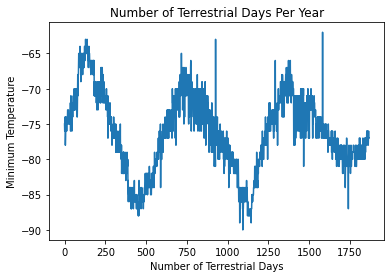

In [54]:
# Plot minimum temperature by days
df['min_temp'].plot()
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.title("Number of Terrestrial Days Per Year")
plt.show()

In [66]:
#Plot minimum temperature by year
# plt.plot(t_date_df['terrestrial_date'],t_date_df['min_temp'])
# plt.xlabel("Number of Terrestrial Days")
# plt.ylabel("Minimum Temperature")
# plt.title("Number of Terrestrial Days Per Year")
# plt.show()

Both graphs show a peak to peak distance of approximately 675 days, which is very close to what internet research suggest. The internet sources suggests that a Martial year is equivalent to 687 earth days.


The temperature is coldest in month three at -83.307292, while the eighth month is the warmest at -68.382979.

The atmospheric psi is the lowest during the sixth month at 745.054422, and is the highest during the ninth month at 913.305970.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [63]:
# Write the data to a CSV
file_name = 'mars_info.csv'
df.to_csv(file_name, index=False)

In [64]:
browser.quit()